In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5cf3140e-488d-47df-be3e-9c49554d8e46',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [40]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5cf3140e-488d-47df-be3e-9c49554d8e46',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'/Users/alinanary/API.csv'):
        df.to_csv(r'/Users/alinanary/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/alinanary/API.csv', mode='a', header=False)




In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) #sleep for 1 minute
exit()

In [ ]:
df72 = pd.read_csv(r'/Users/alinanary/API.csv')
df72

In [43]:
# Floating-point display format configuration

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
# Coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.volume_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.volume_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12539,15.53962,0.33903,40.61024,23.00551,62.92772
Ethereum,-0.14872,17.51207,3.95845,30.75364,12.87038,39.94906
Tether,0.00227,7.60621,0.03848,0.03787,0.03991,0.05269
BNB,0.00372,-0.36343,-0.16282,12.64943,-4.30771,13.53319
USD Coin,-0.00099,7.21767,0.03693,-0.02277,-0.01195,-0.00658
XRP,-0.17838,-14.64355,-2.72234,36.88877,27.33254,43.10351
Cardano,-0.23076,-7.34135,2.82346,25.69326,-0.34059,24.01657
Dogecoin,-0.28899,-5.83141,4.68932,26.97622,-7.08110,8.79992
Polygon,-0.12049,22.29408,0.73436,4.88671,-16.60039,29.49835


In [ ]:
# Stack columns into a single column

df4 = df3.stack()
df4

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [ ]:
index = pd.Index(range(90))


# Set the above DataFrame index object as the index using set_index() function
df6 = df5.set_index(index)
df6

In [ ]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.volume_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

In [62]:
# Import libraries to create data visualizations in Python

import seaborn as sns
import matplotlib.pyplot as plt

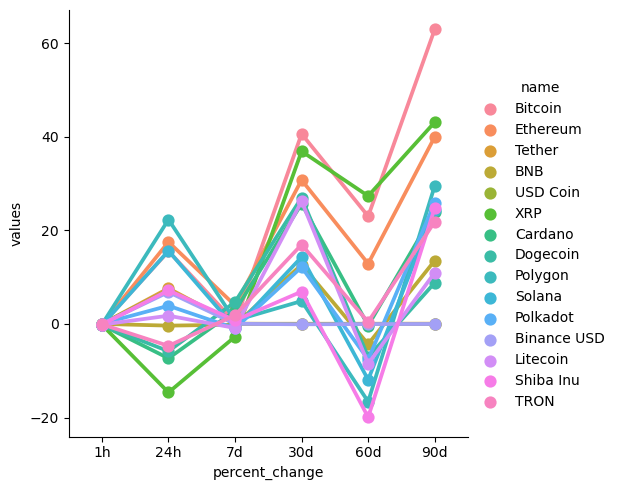

In [63]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [64]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28116.68496,2023-04-09 19:39:47.745782
0,Bitcoin,28116.68496,2023-04-09 19:40:15.222433
0,Bitcoin,28132.35340,2023-04-09 20:30:35.830943
0,Bitcoin,28132.35340,2023-04-09 20:30:56.865342
0,Bitcoin,28132.35340,2023-04-09 20:31:34.232025
0,Bitcoin,28150.11987,2023-04-09 20:32:34.921680
0,Bitcoin,28146.91476,2023-04-09 20:33:35.344588
0,Bitcoin,28145.02266,2023-04-09 20:34:35.983460
0,Bitcoin,28141.83387,2023-04-09 20:35:36.421764
0,Bitcoin,28148.11211,2023-04-09 20:36:36.818072


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

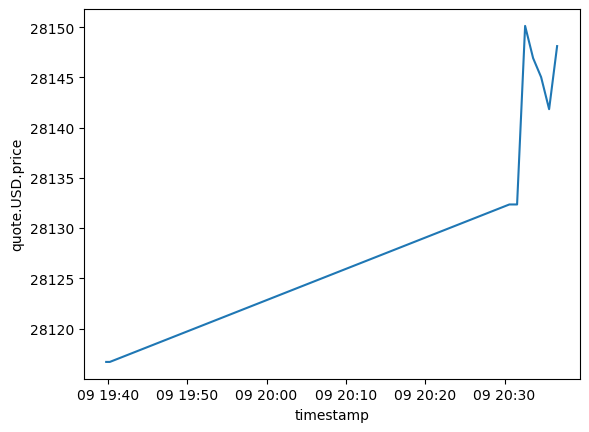

In [65]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)